Loading the dataset

In [1]:
!pip install kaggle

In [2]:
#create a kaggle directory
!mkdir ~/.kaggle

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:15<00:00, 29.6MB/s]
100% 428M/428M [00:15<00:00, 29.7MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

IMPORT MODULES

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [6]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')


Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [9]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral


In [10]:
df['label'].value_counts()

,count
label,
neutral,400
ps,400
sad,400
angry,400
happy,400
fear,400
disgust,400


In [11]:
df['label_count']= df['label'].value_counts()
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral
...,...,...
2795,/content/tess toronto emotional speech set dat...,fear
2796,/content/tess toronto emotional speech set dat...,fear
2797,/content/tess toronto emotional speech set dat...,fear
2798,/content/tess toronto emotional speech set dat...,fear


<Axes: xlabel='label', ylabel='count'>

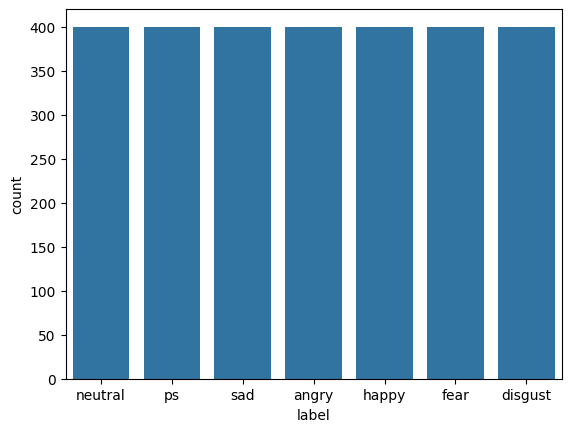

In [12]:
sns.countplot(data=df, x='label')

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [15]:
df.drop('label_count',axis=1,inplace=True)

In [16]:
print(df.head())
print(df['label'].unique())

                                              speech    label
0  /content/tess toronto emotional speech set dat...  neutral
1  /content/tess toronto emotional speech set dat...  neutral
2  /content/tess toronto emotional speech set dat...  neutral
3  /content/tess toronto emotional speech set dat...  neutral
4  /content/tess toronto emotional speech set dat...  neutral
['neutral' 'ps' 'sad' 'angry' 'happy' 'fear' 'disgust']


In [17]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vote_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_boat_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_shout_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_time_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_kill_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_vine_fear.wav'],
      dtype=object)

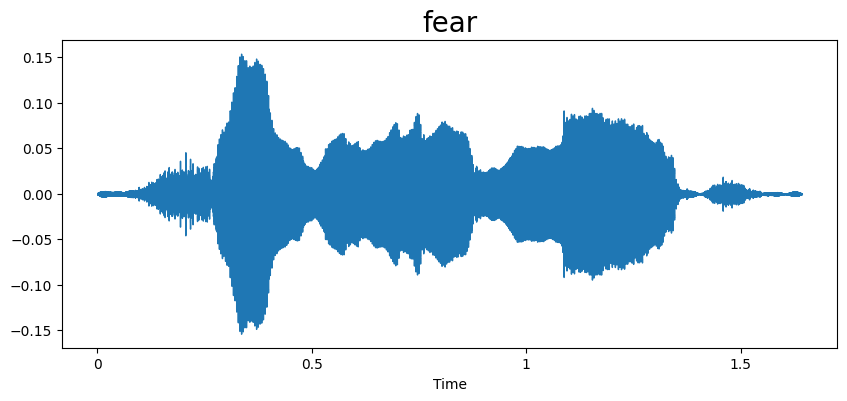

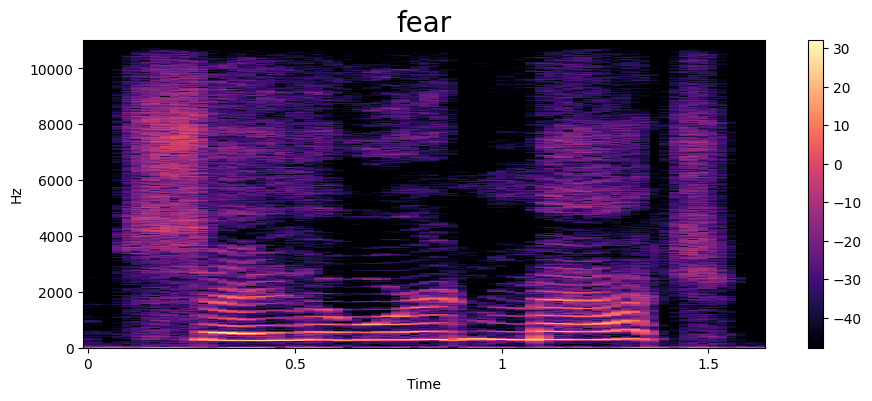

In [18]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

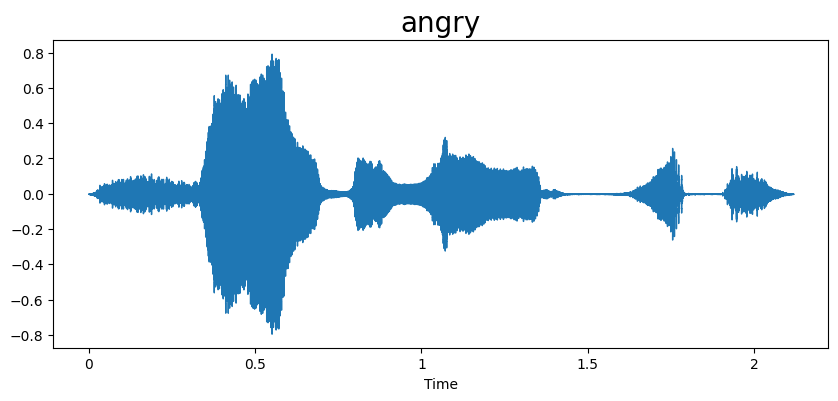

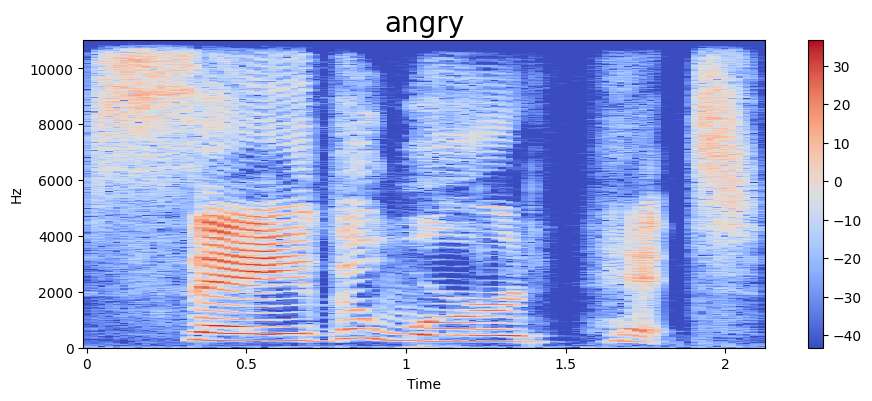

In [19]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

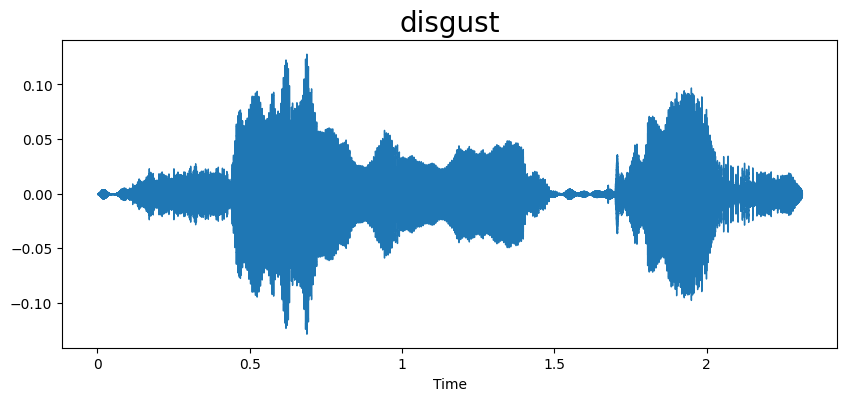

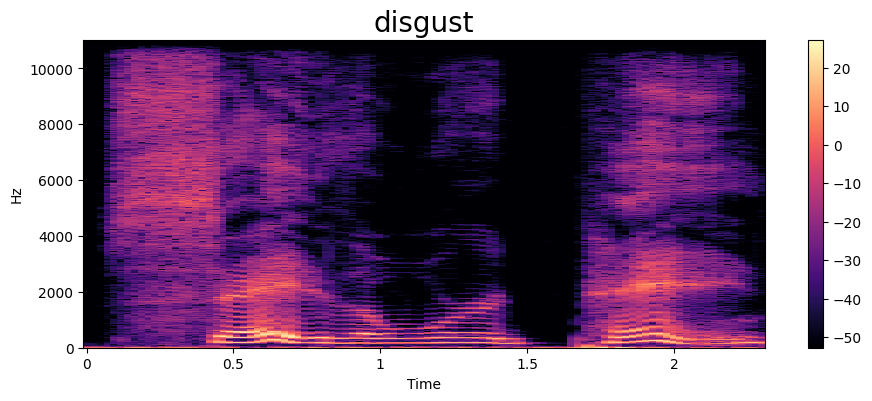

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

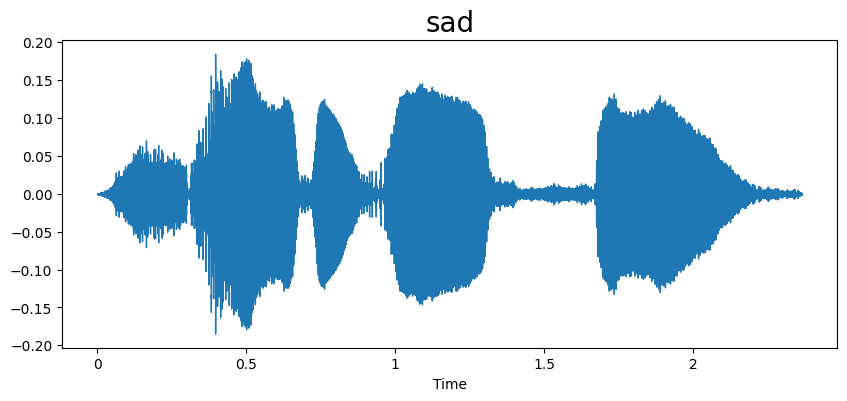

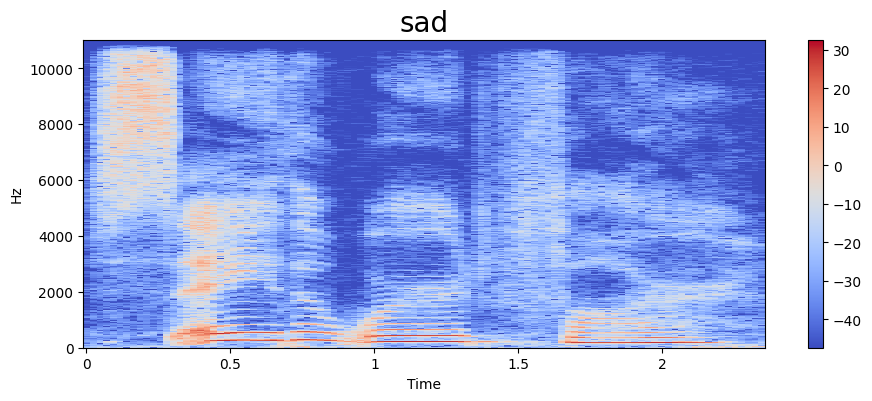

In [21]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

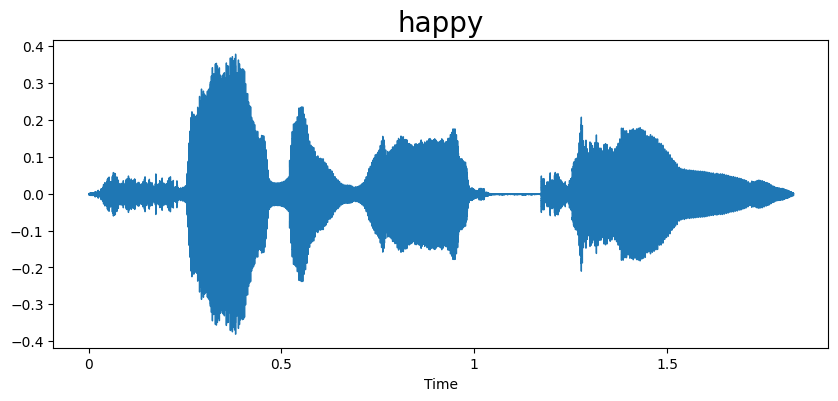

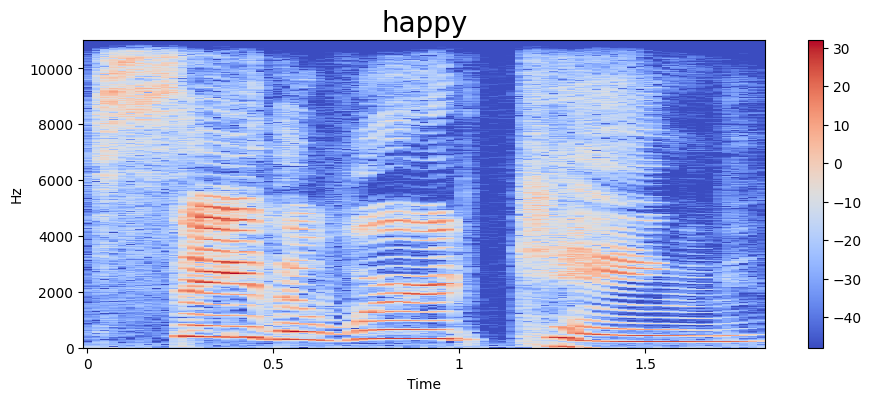

In [22]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

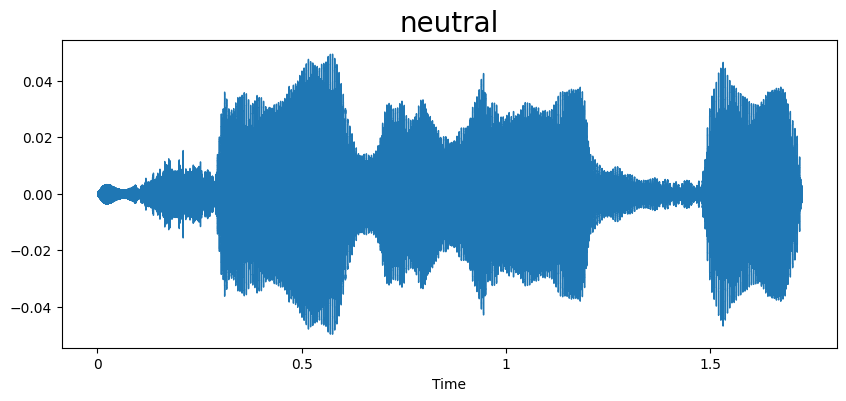

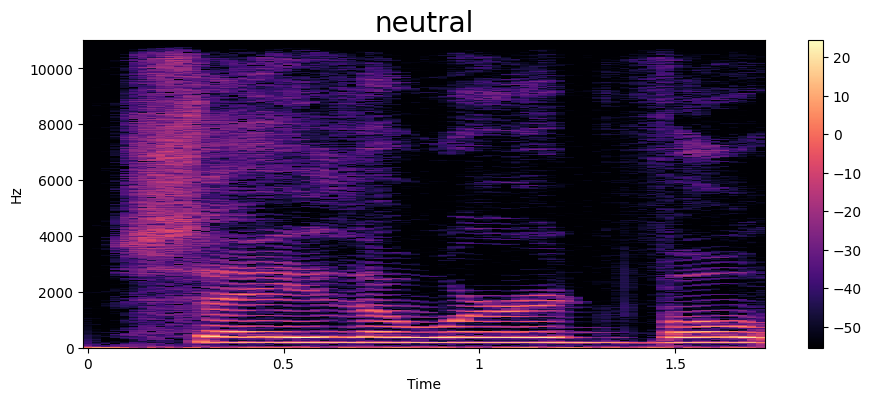

In [23]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

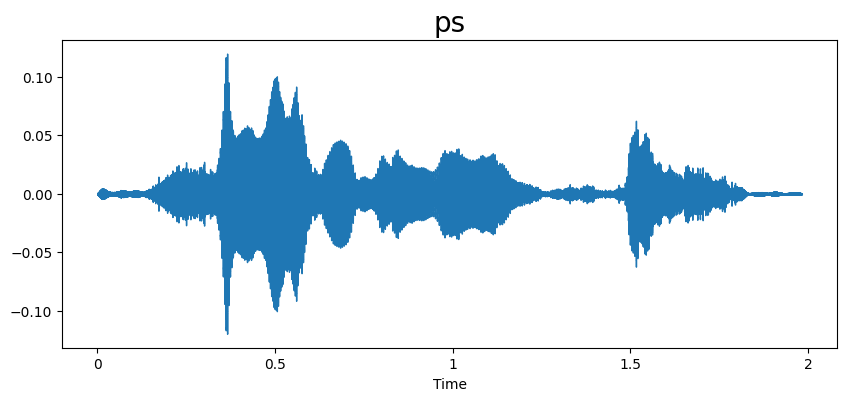

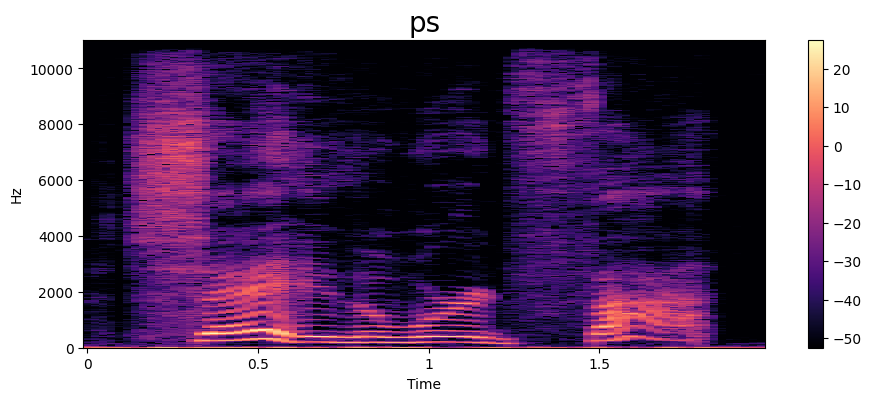

In [24]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [25]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [26]:
extract_mfcc(df['speech'][0])

array([-5.4714282e+02,  1.1375922e+02,  3.5436787e+01, -5.0645733e+00,
        1.2502842e+01,  8.8926659e+00, -2.1625059e+00, -6.8215075e+00,
       -1.6317657e+01, -3.9032538e+00, -1.1600011e+01, -2.9553862e+00,
       -1.0308375e+01,  7.9907513e-01,  7.5383334e+00,  1.0993689e+00,
       -7.9385507e-01,  7.1820908e+00, -2.6681559e+00, -1.3282095e+00,
       -1.9314733e+00,  3.1614476e-01, -3.2305813e+00, -1.7383832e+00,
       -1.1845677e+01, -6.7825902e-01, -1.3334084e+01,  1.9638649e+00,
       -3.3065240e+00, -4.8334970e+00, -8.0299635e+00, -7.2876577e+00,
       -9.0410223e+00, -1.4933874e-01,  2.2662422e+01,  3.4935192e+01,
        4.5936520e+01,  4.2933243e+01,  2.6993286e+01,  1.0572157e+01],
      dtype=float32)

In [27]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [28]:
X_mfcc

,speech
0,"[-547.1428, 113.75922, 35.436787, -5.0645733, ..."
1,"[-533.6521, 112.14889, 36.682503, 3.1267436, 6..."
2,"[-481.6557, 80.43489, 14.06739, 3.7248943, 8.2..."
3,"[-505.0079, 97.62334, 13.907459, 3.4893417, 15..."
4,"[-553.5752, 106.701195, 35.995552, 8.247646, 8..."
...,...
2795,"[-298.43918, 55.540203, -15.294176, -3.9173093..."
2796,"[-254.47058, 57.12825, -39.79231, 6.764894, -6..."
2797,"[-333.81586, 40.91223, -19.692923, 13.061709, ..."
2798,"[-321.49887, 47.913506, -19.302774, 13.760705,..."


In [29]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [30]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [32]:
y=y.toarray()

In [33]:
y.shape

(2800, 7)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

Create a LSTM Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.2477 - loss: 1.8617 - val_accuracy: 0.5143 - val_loss: 1.1045
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.5301 - loss: 1.1725 - val_accuracy: 0.7768 - val_loss: 0.6883
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.6760 - loss: 0.8447 - val_accuracy: 0.8732 - val_loss: 0.4168
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.7950 - loss: 0.5589 - val_accuracy: 0.9161 - val_loss: 0.3236
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.8709 - loss: 0.4177 - val_accuracy: 0.9429 - val_loss: 0.1873
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9264 - loss: 0.2760 - val_accuracy: 0.9625 - val_loss: 0.1402
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9175 - loss: 0.3078 - val_accuracy: 0.9339 - val_loss: 0.2072
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9183 - loss: 0.2606 - val_accurac

Visualize the results

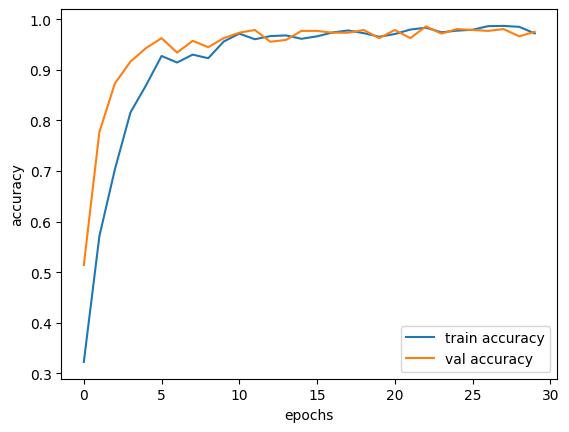

In [37]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

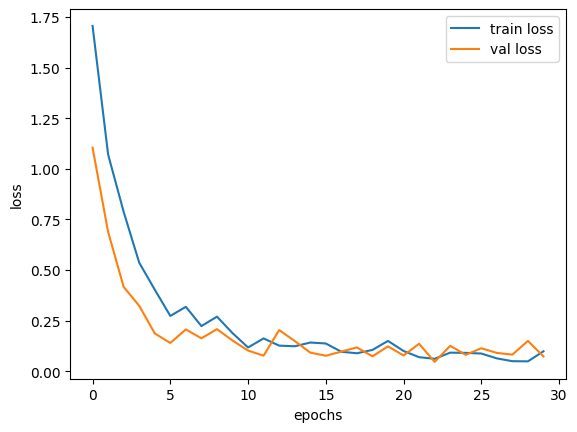

In [38]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[66  0  0  1  0  0  0]
 [ 0 81  0  0  0  2  0]
 [ 0  0 70  0  0  0  0]
 [ 1  1  0 69  0  8  0]
 [ 0  0  0  0 86  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  1  0  0  0  0 98]]


In [42]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.99      0.99      0.99        67
     disgust       0.98      0.98      0.98        83
        fear       1.00      1.00      1.00        70
       happy       0.99      0.87      0.93        79
     neutral       1.00      1.00      1.00        86
          ps       0.88      1.00      0.94        76
         sad       1.00      0.99      0.99        99

    accuracy                           0.97       560
   macro avg       0.98      0.97      0.97       560
weighted avg       0.98      0.97      0.97       560

